# 数值导数
利用泰勒级数可以给出近似记算函数导数的方法

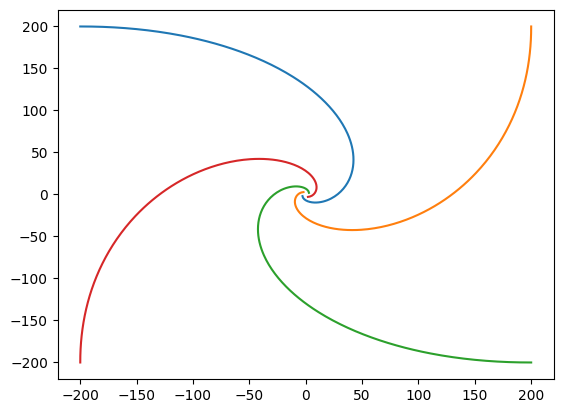

In [3]:
import numpy as np
import numpy.linalg as ng
import matplotlib.pyplot as plt

N = 4  #人数4人
v = 1.0  #恒定速度为1m/s
d = 200.0
time = 400.0
divs = 201
xy = np.array([[-d,d],[d,d],[d,-d],[-d,-d]])  #4人的初始位置
T = np.linspace(0,time,divs)
dt = T[1]-T[0]
xyn = np.empty((4,2))
Txy = xy
for n in range(1,len(T)):
    for i in [0,1,2,3]:
        j = (i+1)%4
        dxy = xy[j]-xy[i]
        dd = dxy/ng.norm(dxy)  #单位化向量  对向量 dxy 进行单位化（归一化），即将向量转换为方向相同但长度为1的单位向量。
        xyn[i] = xy[i]+v*dt*dd  #记算下一步的位置
    Txy = np.c_[Txy,xyn]  #将数组 xyn 作为新列拼接到 Txy 的右侧。
    xy = xyn.copy()  #功能: 创建 xyn 的独立副本，赋值给 xy。.copy(): 避免浅拷贝问题，确保修改 xy 不会影响 xyn。
for i in range(N):
    plt.plot(Txy[i,::2], Txy[i,1::2])
plt.show()